In [39]:
# LOGISTIC REGRESSION ASSIGNMENT:

In [40]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
# Loading the datasets:
train=pd.read_csv('Titanic_train.csv')
test=pd.read_csv('Titanic_test.csv')

In [42]:
# Concatenating both datasets for preprocessing:
test['type'] = "test"
train['type'] = "train"
df = pd.concat([test, train])

In [43]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,type
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test


In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [45]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,type,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test,NaN


In [46]:
df.shape

(1309, 13)

In [47]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  type         1309 non-null   object 
 12  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [49]:
# Since the cabin column is missing 75 percent values we drop the column
df=df.drop('Cabin',axis='columns')

D:\Coding\DS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


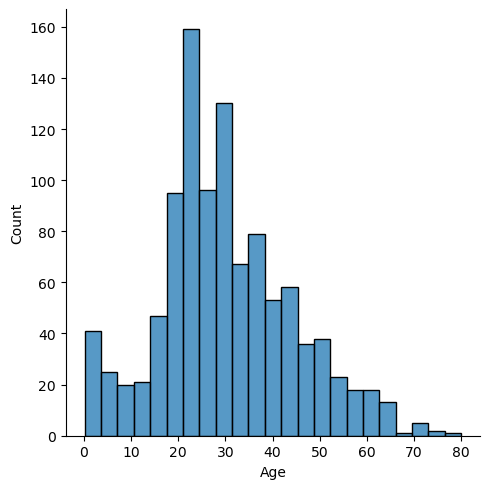

In [50]:
# Making a distribution plot for age variable
sns.displot(df['Age'])

In [51]:
# Since age is close to a normal distribution we can impute it with mean
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [52]:
# Only one value is missing so we fill it with mean
df['Fare'] = df['Fare'].fillna(np.mean(df['Fare']))

In [53]:
# Imputing Embarked variable with S as its the mode
print(df['Embarked'].unique())
print(df['Embarked'].value_counts()['Q'])
print(df['Embarked'].value_counts()['S'])
print(df['Embarked'].value_counts()['C'])
df['Embarked'] = df['Embarked'].fillna('S')

['Q' 'S' 'C' nan]
123
914
270


In [54]:
df['Age'] = df['Age'].astype(int)

In [55]:
# We should not impute the survived variable as it accounts to who lived '1' and who died '0'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   int32  
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
 10  type         1309 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 127.8+ KB


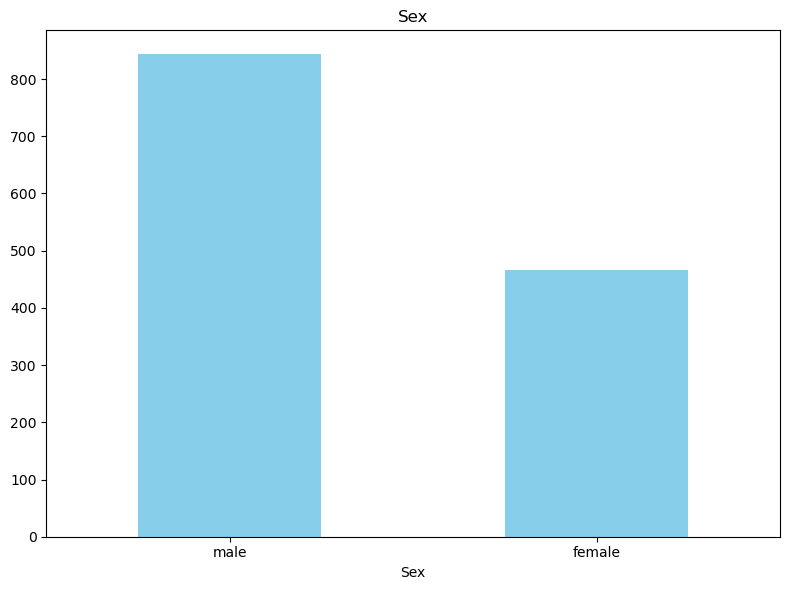

In [56]:
counts = df['Sex'].value_counts()
# Plotting barplot for Sex variable
plt.figure(figsize=(8, 6))  
counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Sex')
plt.xticks(rotation=0)  
plt.tight_layout()

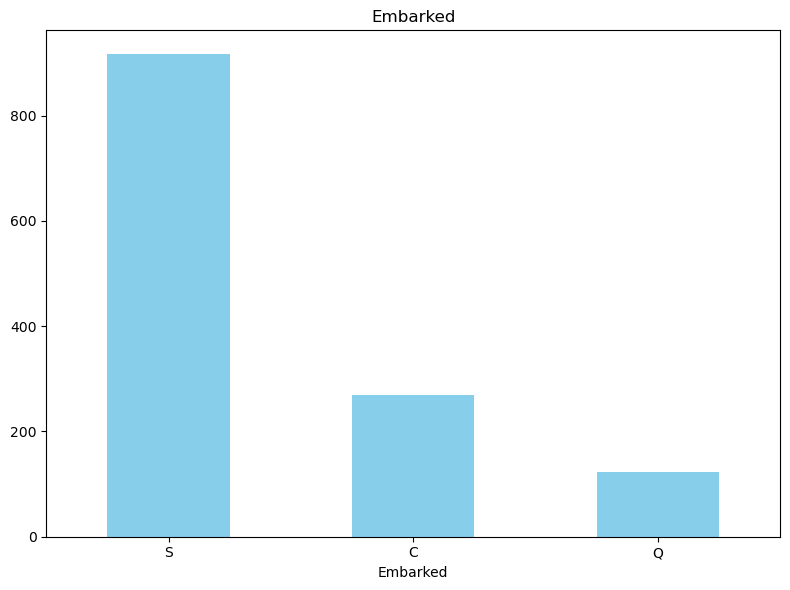

In [57]:
counts = df['Embarked'].value_counts()
# Plotting barplot for Embarked  variable
plt.figure(figsize=(8, 6))  
counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Embarked')
plt.xticks(rotation=0)  
plt.tight_layout()

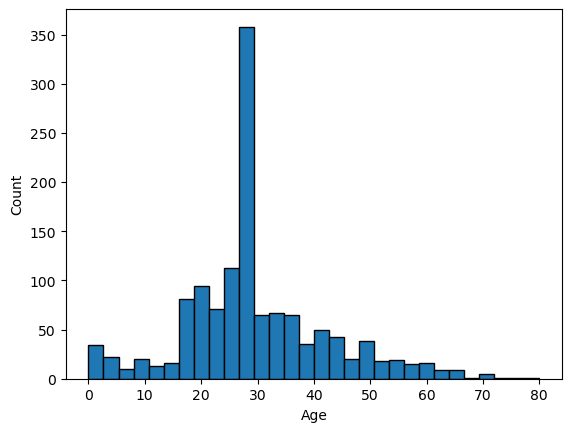

In [58]:
# Histogram for the variable Age
# Most of the passengers travelling were younger than 30
# Normal distribution
plt.hist(df['Age'],edgecolor='black',bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

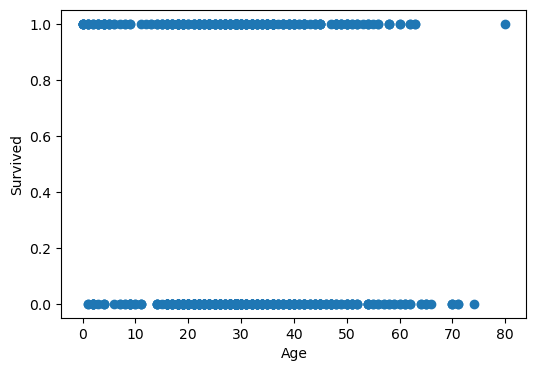

In [59]:
# Age against Survived scatterplot
# shows that more younger people survived than older people 
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df['Age'], df['Survived'])
ax.set_xlabel('Age')
ax.set_ylabel('Survived')
plt.show()

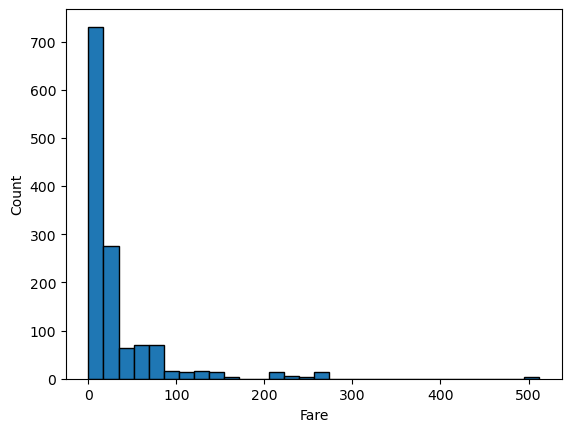

In [60]:
# Histogram for the variable Fare
# Most of the passengers travelling were travelling 3rd class(meaning business)
# Normal distribution
plt.hist(df['Fare'],edgecolor='black',bins=30)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

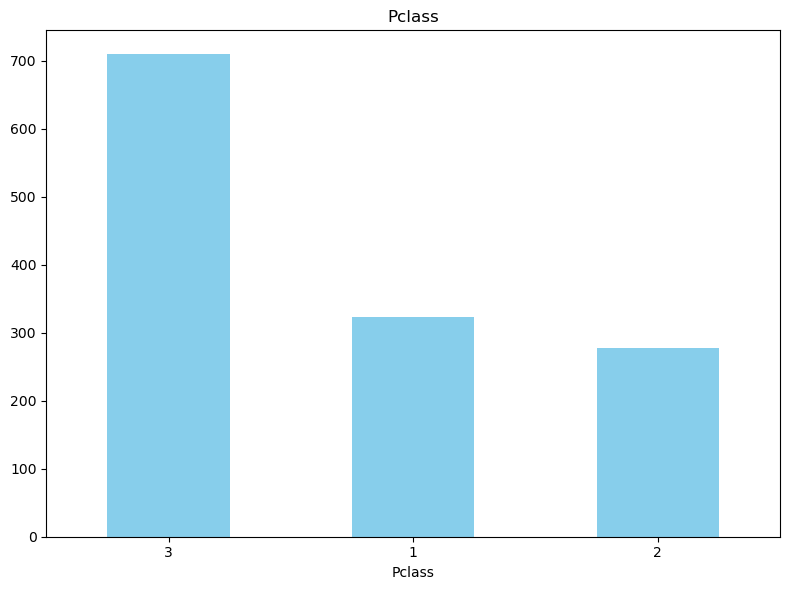

In [61]:
# Most of the passengers were business class
counts = df['Pclass'].value_counts()
# Plotting barplot for class  variable
plt.figure(figsize=(8, 6))  
counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Pclass')
plt.xticks(rotation=0)  
plt.tight_layout()

In [62]:
# Dependent Variable: survived
# Independent Variable:Everything except name
# We perform one hot encoding on the categorical variables now
# we ignore Name and Ticket number as they have no influence on the variable survived

In [63]:
ohe1=pd.get_dummies(df['Sex'],dtype='int')
ohe2=pd.get_dummies(df['Embarked'],dtype='int')
df=pd.concat([df,ohe1,ohe2],axis='columns')

In [64]:
df=df.drop(['Sex','Embarked'],axis='columns')
df

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,type,Survived,female,male,C,Q,S
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,test,NaN,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,test,NaN,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,test,NaN,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,test,NaN,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,test,NaN,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,train,0.0,0,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,train,1.0,1,0,0,0,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",29,1,2,W./C. 6607,23.4500,train,0.0,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,train,1.0,0,1,1,0,0


In [65]:
# now split the data back to train and test 
train = df[df['type'] == "train"]
test = df[df['type'] == "test"]
df.drop(['type'],axis = 1,inplace = True)

In [66]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Survived,female,male,C,Q,S
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,NaN,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,NaN,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,NaN,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,NaN,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,NaN,1,0,0,0,1


In [67]:
# we now drop the column name as it doenst have any influence on the dependent variable:
train=train.drop(['Name','type'],axis='columns')
test=test.drop(['Name','type'],axis='columns')

In [68]:
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Survived,female,male,C,Q,S
0,1,3,22,1,0,A/5 21171,7.2500,0.0,0,1,0,0,1
1,2,1,38,1,0,PC 17599,71.2833,1.0,1,0,1,0,0
2,3,3,26,0,0,STON/O2. 3101282,7.9250,1.0,1,0,0,0,1
3,4,1,35,1,0,113803,53.1000,1.0,1,0,0,0,1
4,5,3,35,0,0,373450,8.0500,0.0,0,1,0,0,1


In [69]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Survived,female,male,C,Q,S
0,892,3,34,0,0,330911,7.8292,NaN,0,1,0,1,0
1,893,3,47,1,0,363272,7.0000,NaN,1,0,0,0,1
2,894,2,62,0,0,240276,9.6875,NaN,0,1,0,1,0
3,895,3,27,0,0,315154,8.6625,NaN,0,1,0,0,1
4,896,3,22,1,1,3101298,12.2875,NaN,1,0,0,0,1


In [72]:
# now we split the data into X_train, y_train and X_test:
# Didnt consider the columns Ticket, Passenger Id  because they don't influence the dependent variable
X_train=train[['Pclass' ,'Age' ,'SibSp' ,'Parch' 	 ,'Fare' , 	'female',	'male', 	'C', 	'Q', 	'S']]
X_train

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22,1,0,7.2500,0,1,0,0,1
1,1,38,1,0,71.2833,1,0,1,0,0
2,3,26,0,0,7.9250,1,0,0,0,1
3,1,35,1,0,53.1000,1,0,0,0,1
4,3,35,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,0,1,0,0,1
887,1,19,0,0,30.0000,1,0,0,0,1
888,3,29,1,2,23.4500,1,0,0,0,1
889,1,26,0,0,30.0000,0,1,1,0,0


In [86]:
y_train=train['Survived']
y_train

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [80]:
X_test=test[['Pclass' ,'Age' ,'SibSp' ,'Parch' 	 ,'Fare' , 	'female',	'male', 	'C', 	'Q', 	'S']]
X_test

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,34,0,0,7.8292,0,1,0,1,0
1,3,47,1,0,7.0000,1,0,0,0,1
2,2,62,0,0,9.6875,0,1,0,1,0
3,3,27,0,0,8.6625,0,1,0,0,1
4,3,22,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,29,0,0,8.0500,0,1,0,0,1
414,1,39,0,0,108.9000,1,0,1,0,0
415,3,38,0,0,7.2500,0,1,0,0,1
416,3,29,0,0,8.0500,0,1,0,0,1


In [88]:
# Now we import the model using sklearn
from sklearn.linear_model import LogisticRegression 

In [89]:
model = LogisticRegression()
model.fit(X_train,y_train)

D:\Coding\DS\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
model.predict(X_test)

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [91]:
# Calculating the Coefficient 
print(model.coef_)

[[-0.9984697  -0.03470432 -0.28704982 -0.12265733  0.00268344  2.1655974
  -0.47248659  0.77610992  0.58739537  0.32960551]]


In [ ]:
# Significant Features:
# Most of the survivors are from the Male category
# Most of the survivors are from the with pclass=3
# Most of the survivors are with embarked =S

In [ ]:
# Model Evaluation:
Model evaluation is not possible as there is no y_test variable column in the given test_dataset
we can calculate the model scores if we have the survival 